# Introduction

In this notebook we demonstrate the use of **Word Embeddings (Word2Vec)** weighting technique into Information Retrieval to make trace link recovery between Test Cases and Bug Reports.

We model our study as follows:

* Each bug report title, summary and description compose a single query.
* We use each test case content as an entire document that must be returned to the query made

# Import Libraries

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import pprint

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import br_feat_final_matrix_handler as b2f_handler

from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

# Load Datasets

In [2]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (21, 8)


# Running LSI Model - Exp-Vol UNION Oracle

In [3]:
models_runner_1 = Feat_BR_Models_Runner()

wv_model_1 = models_runner_1.run_word2vec_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

sim_thresh = 0.0

wv_eval_t1 = evaluator_1.evaluate_model(model=wv_model_1, top_value=1, sim_threshold=sim_thresh)
wv_eval_t3 = evaluator_1.evaluate_model(model=wv_model_1, top_value=3, sim_threshold=sim_thresh)
wv_eval_t5 = evaluator_1.evaluate_model(model=wv_model_1, top_value=5, sim_threshold=sim_thresh)
wv_eval_t10 = evaluator_1.evaluate_model(model=wv_model_1, top_value=10, sim_threshold=sim_thresh)

Features.shape: (21, 8)
SelectedBugReports.shape: (91, 18)
Running W2V model -----
Expert and Volunteers Matrix UNION.shape: (91, 21)


# Similarity Matrix

In [4]:
aux_functions.highlight_df(wv_model_1.get_sim_matrix().iloc[0:23, 0:14])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.934949,0.929217,0.890804,0.875051,0.832119,0.93057,0.898468,0.920505,0.78552,0.799705,0.88999,0.899868,0.883348,0.790893
windows_child_mode,0.843091,0.900504,0.82063,0.842726,0.789301,0.863257,0.853488,0.859123,0.731952,0.716476,0.863776,0.855012,0.817152,0.713528
apz_async_scrolling,0.822531,0.863177,0.798017,0.846902,0.754566,0.893438,0.831443,0.890015,0.702703,0.678926,0.836052,0.853628,0.793911,0.702561
browser_customization,0.835262,0.85205,0.827119,0.857033,0.882645,0.833811,0.828967,0.837046,0.817073,0.853097,0.876534,0.862747,0.849495,0.832272
pdf_viewer,0.778693,0.779521,0.786017,0.829928,0.854068,0.792893,0.75331,0.800196,0.787216,0.830178,0.824856,0.838544,0.82243,0.808751
context_menu,0.920058,0.88074,0.851112,0.803638,0.753273,0.859855,0.8412,0.838703,0.675081,0.698358,0.841422,0.833489,0.784805,0.689515
w10_comp,0.880215,0.88458,0.85664,0.866774,0.846003,0.90572,0.88072,0.893973,0.781733,0.808718,0.914045,0.893093,0.851143,0.78603
tts_in_desktop,0.831585,0.846309,0.817743,0.85782,0.896116,0.852287,0.825447,0.852932,0.827877,0.856867,0.850145,0.868945,0.869034,0.846135
tts_in_rm,0.84053,0.841126,0.827004,0.856205,0.865305,0.852443,0.827757,0.846328,0.815029,0.843877,0.852265,0.851766,0.841961,0.826151


# Analysis of BR x Feat Generated Traces

In [5]:
handler = b2f_handler.BR_Feat_Final_Matrix_Handler(mode=b2f_handler.HandlerMode.LOAD)
br_2_features_matrix_final = handler.add_mappings_1(columns_names=['Features_IDs_wv_t1_m',
                                                                   'Features_IDs_wv_t3_m',
                                                                   'Features_IDs_wv_t5_m',
                                                                   'Features_IDs_wv_t10_m',
                                                                   'Features_IDs_orc'],
                                                    trace_matrices=[wv_eval_t1['trace_links_df'],
                                                                    wv_eval_t3['trace_links_df'],
                                                                    wv_eval_t5['trace_links_df'],
                                                                    wv_eval_t10['trace_links_df'],
                                                                    evaluator_1.get_oracle_df()],
                                                    is_from_model=True)

br_2_features_matrix_final = handler.add_mappings_2(dest_columns_names=['f_names_wv_t1',
                                                                        'f_names_wv_t3',
                                                                        'f_names_wv_t5',
                                                                        'f_names_wv_t10',
                                                                        'f_names_orc'],
                                                   orig_columns_names=['Features_IDs_wv_t1_m',
                                                                       'Features_IDs_wv_t3_m',
                                                                       'Features_IDs_wv_t5_m',
                                                                       'Features_IDs_wv_t10_m',
                                                                       'Features_IDs_orc'])
br_2_features_matrix_final.head(10)

SelectedBugReports.shape: (91, 18)
Features.shape: (21, 8)
BR_2_Features Matrix Final.shape: (91, 5)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_wv_t1_m,Features_IDs_wv_t3_m,Features_IDs_wv_t5_m,Features_IDs_wv_t10_m,Features_IDs_orc,f_names_wv_t1,f_names_wv_t3,f_names_wv_t5,f_names_wv_t10,f_names_orc
Bug_Number,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,1,1 6 7,1 2 6 7 19,1 2 4 6 7 8 9 12 14 19,6,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,1,1 2 19,1 2 6 7 19,1 2 3 4 6 7 12 18 19 20,4,[[new_awesome_bar]],"[[new_awesome_bar], [windows_child_mode], [fla...","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,1,1 7 18,1 4 6 7 18,1 2 4 6 7 8 9 12 15 18,,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [indicator_dev...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,1,1 7 18,1 7 8 16 18,1 2 3 4 7 8 9 15 16 18,1,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [indicator_dev...","[[new_awesome_bar], [w10_comp], [tts_in_deskto...","[[new_awesome_bar], [windows_child_mode], [apz...",[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,8,4 8 18,4 8 9 11 18,1 4 5 7 8 9 11 15 16 18,,[[tts_in_desktop]],"[[browser_customization], [tts_in_desktop], [i...","[[browser_customization], [tts_in_desktop], [t...","[[new_awesome_bar], [browser_customization], [...",[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,1,1 3 7,1 2 3 6 7,1 2 3 6 7 8 9 12 18 19,3,[[new_awesome_bar]],"[[new_awesome_bar], [apz_async_scrolling], [w1...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,1,1 7 19,1 2 6 7 19,1 2 3 4 6 7 8 9 18 19,,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [flash_support]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,1,1 3 7,1 2 3 7 8,1 2 3 6 7 8 9 12 18 19,3,[[new_awesome_bar]],"[[new_awesome_bar], [apz_async_scrolling], [w1...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,18,8 15 18,4 8 15 16 18,1 4 5 7 8 9 11 15 16 18,,[[indicator_device_perm]],"[[tts_in_desktop], [downloads_dropmaker], [ind...","[[browser_customization], [tts_in_desktop], [d...","[[new_awesome_bar], [browser_customization], [...",[]


# Analysis of Precision and Recall

## Union Strategy

Evaluating WORDVECTOR Model ----- 


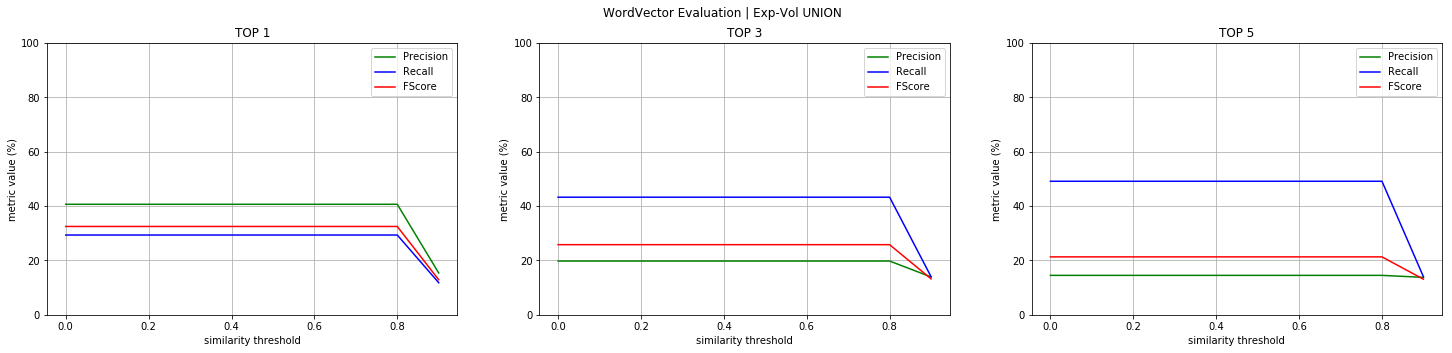

In [6]:
results = evaluator_1.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_1.plot_evaluations_2(title='WordVector Evaluation | Exp-Vol UNION', results=results)

## Intersection Strategy

Expert and Volunteers Matrix INTERSEC.shape: (91, 21)
Evaluating WORDVECTOR Model ----- 


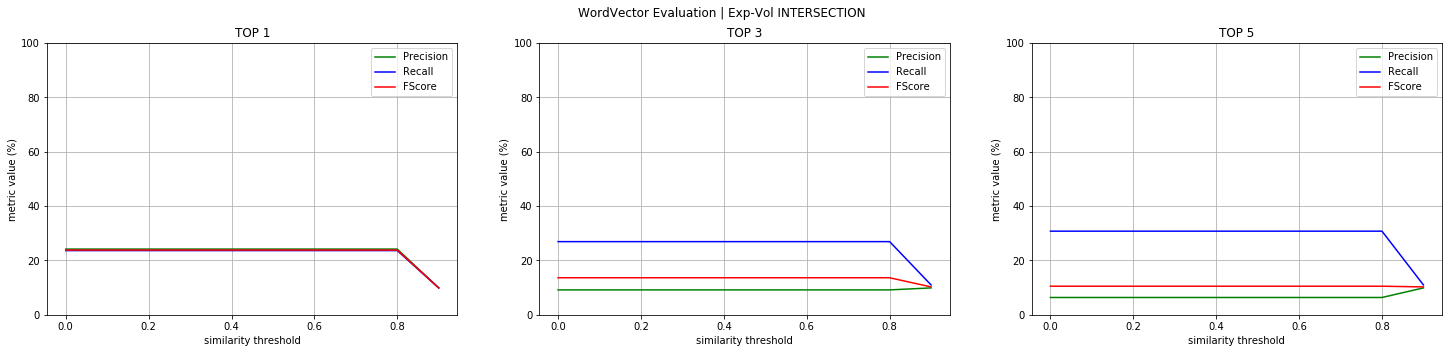

In [7]:
evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)
results = evaluator_2.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_2.plot_evaluations_2(title='WordVector Evaluation | Exp-Vol INTERSECTION', results=results)

## Expert-Only Streategy

Feat_BR Expert Matrix shape: (91, 21)
Evaluating WORDVECTOR Model ----- 


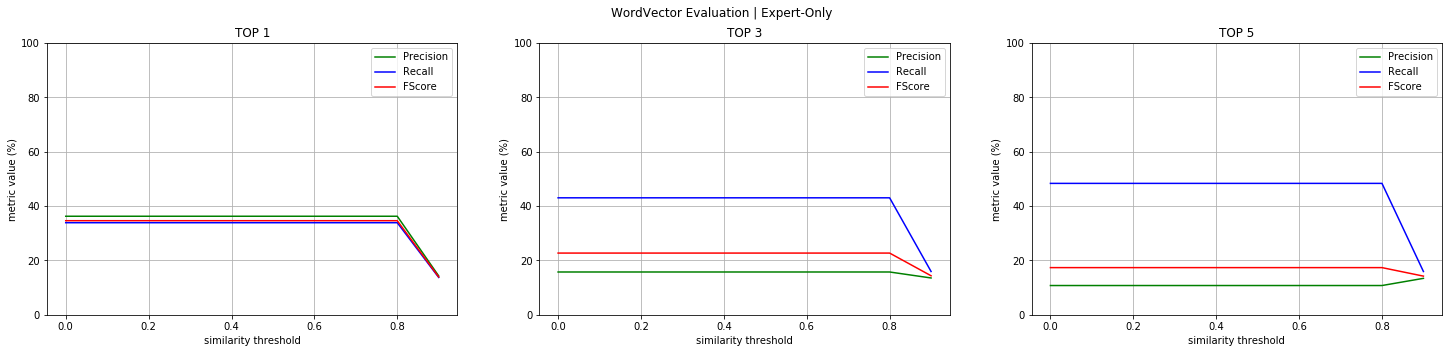

In [8]:
evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_df().T)
results = evaluator_3.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_3.plot_evaluations_2(title='WordVector Evaluation | Expert-Only', results=results)

## Volunteers-Only Streategy

Feat_BR Volunteers Matrix shape: (91, 21)
Evaluating WORDVECTOR Model ----- 


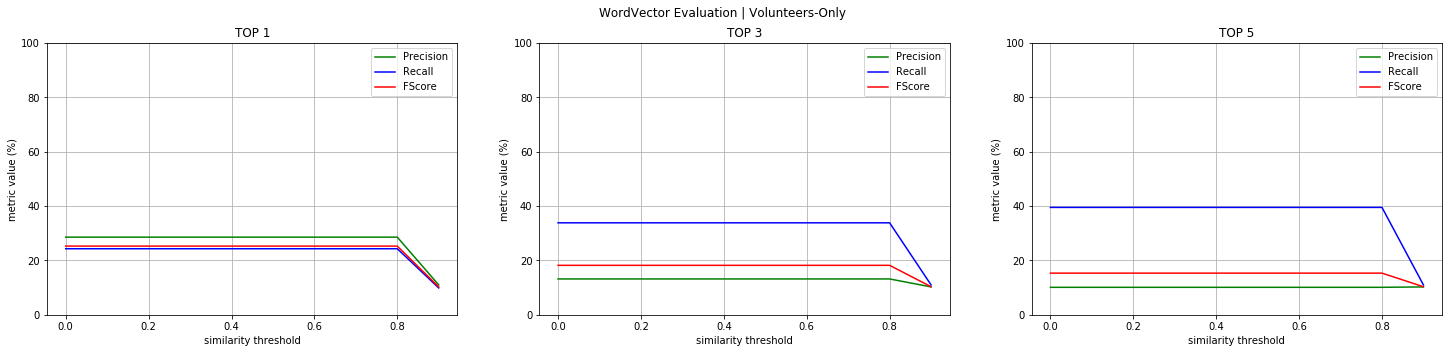

In [9]:
evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)
results = evaluator_4.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_4.plot_evaluations_2(title='WordVector Evaluation | Volunteers-Only', results=results)